# Loading a dataset and saving it as .h5

We will load an image flow cytometry experiment and save it to disk as an .h5 file.
<br> The file will have the following fields:
- X: the data matrix containing all images
- y: the class label for each cell (0: apoptotic, 1: non-apoptotic)
- fnames: the filename for each cell

We assume the experiment/dataset has been saved by the IDEAS software and adheres to the following conventions:
- the images of each class (subpopulation) are saved (exported) in a **separate** subfolder.
- if C the number of channels, then there are C images for each cell and the suffix of the filename corresponds to the channel, followed by ".ome.tif".<br>For example **"62_Ch1.ome.tif"** corresponds to **channel 1** of **cell 62**.
- all subfolders corresponding to different classes, are present in the same folder which corresponds to the experiment.

## Folder hierarchy convention
Experiments must be saved using the **following folder hierarchy**:
<br>./experiment/class1
<br>./experiment/class2
<br>...
<br>./experiment/classN
<br><br>Loading **multiple experiments** at once is also possible by using the following file structure:
<br>./all_experiments/experimentA/class1
<br>./all_experiments/experimentA/class2
<br>...
<br>./all_experiments/experimentA/classN
<br>...
<br>./all_experiments/experimentZ/class1
<br>./all_experiments/experimentZ/class2
<br>...
<br>./all_experiments/experimentZ/classN

## Loading an experiment with import_ideas()

We will load an experiment (dataset) exported with the IDEAS software, using the load_ideas() method.
<br>The dataset consists of two classes: "apoptotic" and "EVs attached" (which are non-apoptotic).
<br> it is saved using the following folder hierarchy:
<br> ./M4 annotated/apoptotic
<br> ./M4 annotated/EVs attached

## Important Note: Reading thousands of single-cell images can be slow!

Reading (tens of) thousands of images from the hard drive can be slow, especially if you are not using and SSD.
<br>import_ideas() will report the progress of the reading process by printing appropriate messages in the terminal.
<br> In this example we will use a small dataset of 401 cells, so reading time will not be an issue.

In [2]:
import numpy as np
np.random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt
import re
import h5py
from decafx.dxio import import_ideas

folder = ('./data/M4 annotated')
imsize = (32,32)#size to resize the images to
classes = ('apoptotic','EVs attached')#classes, corresponding to subfolders of the experiment
channels = (('Ch1','Ch2'),)*len(classes)#channels to read

(X,y,fnames) = import_ideas(folder = folder,
                 classes = classes,
                 channels = channels,
                 imsize = imsize,
                 imtype='uint16',
                 image_dim_ordering='tf')




Scanning in: ./M4 annotated/apoptotic
...channel: Ch1 detected 200 images
...channel: Ch2 detected 200 images
Scanning in: ./M4 annotated/EVs attached
...channel: Ch1 detected 201 images
...channel: Ch2 detected 201 images
Loading apoptotic (class0)
...channel Ch1
...channel Ch2
Loading EVs attached (class1)
...channel Ch1
...channel Ch2


We can see that apoptotic cells were loaded as class0 (y==0) and non-apoptotic cells were loaded as class1 (y==1)
<br>Let's visualize one apoptotic and one non-apoptotic cell.

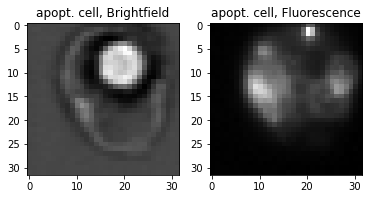

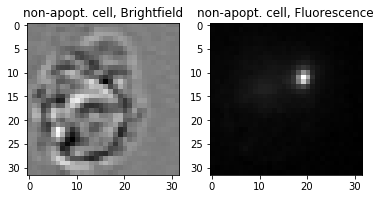

In [3]:
ix_apoptotic = np.where(y==0)[0]#indices of apoptotic cells
ix_nonApoptotic = np.where(y==1)[0]#indices of non-apoptotic cells

#plot the image of an apoptotic cell
plt.figure()
plt.subplot(1,2,1)
plt.imshow(X[ix_apoptotic[0],:,:,0],cmap='gray')
plt.title('apopt. cell, Brightfield')
plt.subplot(1,2,2)
plt.imshow(X[ix_apoptotic[0],:,:,1],cmap='gray')
plt.title('apopt. cell, Fluorescence')
plt.show()

#plot the image of an non-apoptotic cell
plt.figure()
plt.subplot(1,2,1)
plt.imshow(X[ix_nonApoptotic[0],:,:,0],cmap='gray')
plt.title('non-apopt. cell, Brightfield')
plt.subplot(1,2,2)
plt.imshow(X[ix_nonApoptotic[0],:,:,1],cmap='gray')
plt.title('non-apopt. cell, Fluorescence')
plt.show()

## Saving the dataset to an .h5 file (optional)

Now the dataset is loaded in the workspace and can be used for all intents and purposes.
<br>Nonetheless, we will save it to disk as an .h5 file to speed-up reading the same dataset in the future.


In [4]:
#%% save h5py file
h5f = h5py.File('./data/X_M4.h5','a')
h5f.create_dataset('X', data = X)
h5f.create_dataset('y', data = y)
h5f.create_dataset('fnames', data = fnames)
h5f.close()
print('dataset saved to disk!')

dataset saved to disk!


## Loading a dataset saved as .h5

We will load the dataset and check perform a sanity check

In [8]:
#%% load the data from the .h5 file
h5f = h5py.File('./data/X_M4.h5','r')
#h5f.visit(print)#print all filenames in the file
X_new = h5f['X'][()]#images
y_new = h5f['y'][()]#labels
fnames_new = h5f['fnames'][()]
h5f.close()

print('the data is the same:',np.array_equal(X,X_new))
print('the labels are the same:',np.array_equal(y,y_new))
print('the filenames are the same:',np.array_equal(fnames,fnames_new))

the data is the same: True
the labels are the same: True
the filenames are the same: True
